# Übung 11

**Gruppenname:**
TLJ

### 11.1 Curse of Dimensionality

In der Vorlesung haben Sie gelernt, dass nicht intuitive Phänomene in hochdimensionalen Räumen auf Sie warten. Diese Phänomene - oft zusammengefasst als *Fluch der Dimensionalität* bezeichnet - stehen erfolgreichen Machine Learning Projekten oft im Wege, in der eine endliche und meist vorgegebene Datenpunktanzahl den Feature-Raum abdecken muss. Daher haben Sie Dimensionsreduktionsverfahren kennengelernt, die uns dabei helfen können, Daten aus hochdimensionalen Räumen in niedrigdimensionalere Räume zu projizieren.

Für Nächste-Nachbarn Modelle spielt die räumliche Nachbarschaft von Datenpunkten im Feature-Raum eine entscheidende Rolle. Dies trifft auch auf viele andere Lernmodelle aus der Denkschule der Analogisten zu. In dieser Übung werden Sie die *Curse of Dimensionality* untersuchen, in dem Sie sich die Abstände zwischen Datenpunkten in Feature-Räumen ansehen werden.

Ich beschreibe Ihnen zunächst die übergeordneten Ziele, bevor ich Sie Schritt für Schritt durch diese Aufgabe führe.

**Übergeordnete Ziele**
* Sie erstellen eine Abbildung, die den mittleren euklidischen Abstand zwischen zwei zufällig gewählten Vektoren in einem $D$-dimensionalen Hyperkubus der Kantenlänge $1$ in Abhängigkeit der Dimension $D$ darstellt.
* Sie erstellen eine Abbildung, die kürzeste Distanz (also die Distanz zum nächsten Nachbarn) normiert auf die mittlere Distanz zwischen zufällig gewählten Datenpunkten als Funktion der Dimension darstellt.
* Sie interpretieren Ihre beiden Abbildungen hinsichtlich der Curse of Dimensionality und der Nutzung von Nächste-Nachbarn Modellen.

**Ihre Aufgaben**

(1) Schreiben Sie eine Funktion `get_distances`, die die zwei skalaren Werte $N$ (Datenpunktanzahl) und $D$ (Dimension) entgegennimmt. Erzeugen Sie in Ihrer Funktion zwei Datensätze mit je $N$ zufälligen Datenpunkte mit je $D$ Features (Merkmalen), indem Sie die Features [aus einer uniformen Verteilung](https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html) aus dem Interval \[0, 1\] ziehen. Ihre beiden Datensätze `x1` und `x2` sind jeweils Matrizen mit Shape NxD.

* Bestimmen Sie nun die [euklidische](https://numpy.org/doc/stable/reference/generated/numpy.power.html) [Distanz](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sqrt.html) zwischen jeweils einem Datenpunkt aus `x1` und einem Datenpunkt aus `x2`, so dass Sie $N$ Distanzen erhalten. Ermitteln Sie den Mittelwert aus diesen $N$ Distanzen und geben Sie ihn über Ihre Funktion `get_distances` zurück.

In [312]:
import numpy as np
from matplotlib import pyplot as plt

def get_distances(n, d):
    x1 = np.random.uniform(size=(n, d))
    x2 = np.random.uniform(size=(n, d))
    
    distances = np.sqrt(np.sum((x1 - x2) ** 2, axis=1))
    avg_distance = np.mean(distances)
    min_distance_ratio = np.min(distances) / avg_distance
    
    return avg_distance, min_distance_ratio
    
    
get_distances(5,4)

(0.9814250740372685, 0.9143585419608423)

(2) Wählen Sie $N=1000$ und ermitteln Sie mithilfe Ihrer Funktion für $D=1,\ldots, 100$ die mittlere Distanz zwischen zwei zufällig gewählten Datenpunkten in einem $D$-dimensionalen Hyperkubus der Kantenlänge 1. Visualisieren Sie die mittlere Distanz in Abhängigkeit der Dimension $D$.

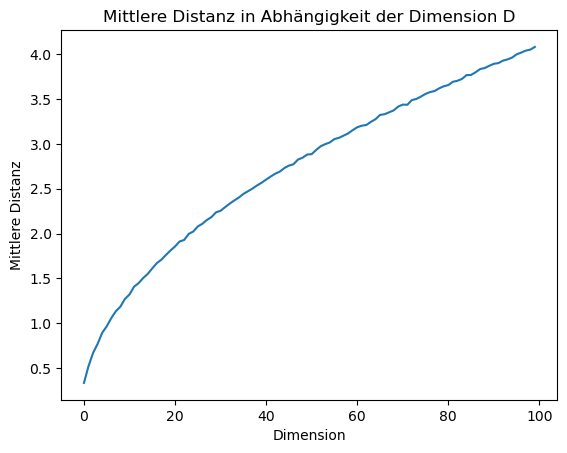

In [313]:
dimension = 100
n = 1000

arrayOfEucDis = np.array([get_distances(n, i+1) for i in range(dimension)]).T
    
plt.plot(arrayOfEucDis[0])
plt.xlabel("Dimension")
plt.ylabel("Mittlere Distanz")
plt.title( "Mittlere Distanz in Abhängigkeit der Dimension D" )
plt.show()

(3) Interpretieren Sie Ihre Abbildung aus dem vorherigen Schritt: Was beobachten Sie? (1-3 Sätze)

- Die Mittlere Distanz steigt logarithmisch. Zu erst gibt es einen großen Anstieg der Mittleren Distanz und dann flacht die Steigungskurve ab. 

(4) In Nächste-Nachbarn Modellen spielen die nächsten Nachbarn eines Datenpunktes bei der Klassifikation oder Regression eine entscheidende Rolle. Modifizieren Sie Ihre Funktion wie folgt: Bestimmen Sie die [kürzeste Distanz](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.min.html) von den $N$ Distanzen und geben Sie zusätzlich den Quotienten (kürzeste Distanz / mittlere Distanz) zurück. Erzeugen Sie eine neue Abbildung, in der Sie Ihren Quotienten gegen die Dimension $D$ auftragen.

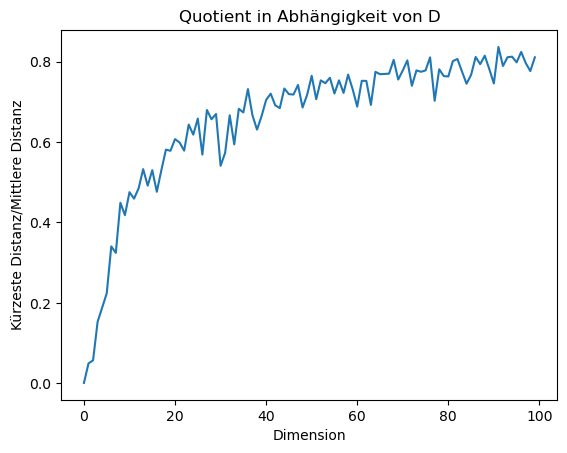

In [314]:
plt.plot(arrayOfEucDis[1])
plt.xlabel("Dimension")
plt.ylabel("Kürzeste Distanz/Mittlere Distanz")
plt.title("Quotient in Abhängigkeit von D")
plt.show()

(5) Interpretieren Sie Ihre Abbildung aus dem vorherigen Schritt. 

* Wie verhält sich die kürzeste Distanz zur mittleren Distanz zwischen zufälligen Datenpunkten, wenn die Dimension $D$ wächst? (1 Satz) 
* Was bedeutet Ihr Ergebnis für Nächste-Nachbarn Modelle und für alle Verfahren, bei denen die Ähnlichkeit (bzw. Distanz) von Datenpunkten eine entscheidende Rolle spielen? (1-3 Sätze)
* Nächste Nachbarn im niedrigdimensionalen Raum liegen nah an dem Datenpunkt, für den wir einen nächsten Nachbarn suchen. Wir suchen also in einer lokalen Umgebung. Wie ändert sich diese Umgebung in hohen Dimensionen?

###  11.2 Weinqualitäten (PCA und NN)

In der Übung 9.2 konnten Sie bereits Bekanntschaft mit einem klassischen Datensatz im Machine Learning machen, den wir jetzt weiter untersuchen werden. Die Weine dreier italienischer Landwirte wurden auf ihre chemische Zusammensetzung hin untersucht. Dabei entstand in den 80er Jahren ein Datensatz, der zu einem der Klassiker im Machine Learning zählt. Sie werden mit dem k-nächste-Nachbarn Modell anhand der chemischen Zusammensetzung (Features) vorhersagen, von welchem der drei Landwirte (Labels) der Wein stammt. Dabei werden Sie Ihre Vorhersagen einmal direkt auf den Features und einmal auf PCA-transformierten Features durchführen.

**Ihre Daten**

Ich habe Ihnen den Weindatensatz in zwei Teile geteilt: Der erste Datensatz ist der sogenannte Trainingsdatensatz, mithilfe dessen Sie ihr Modell bauen werden. Der zweite Datensatz ist der sogenannte Testdatensatz, auf dem Sie ihr Modell anwenden und testen werden.

In [315]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# import data
column_names = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 
                'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df.columns = column_names

# preprocess data: split in training and test sets
X, y = df.iloc[:, 1:].values, df.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=10)


# Your data: 
# training set: X_train, y_train
# test set:     X_test,  y_test

**Ihre Aufgaben**

(1) Importieren Sie die Daten, indem Sie die obere Code-Zelle ausführen.

(2) Vergegenwärtigen Sie sich die Eigenschaften des Wein-Datensatzes: Welche Eigenschaften wurden für die Weine erfasst (Variable `column_names`)? Wie viele Weinproben wurden genommen?

178 Datensätze
und 13 Attribute

In [316]:
print(X.shape)

(178, 13)


(3) Nächste-Nachbar-Modelle können empfindlich auf die Skalierung der Daten reagieren. In manchen Situationen ist es erwünscht, dass unterschiedliche Features unterschiedlich skaliert vorliegen (und damit meist in unterschiedlichen Einheiten angegeben werden). In vielen Fällen wollen wir aber, dass alle Features gleich skaliert vorliegen.

* Untersuchen Sie also zunächst, ob die Daten standardisiert vorliegen: Haben alle Features denselben Mittelwert und dieselbe Standardabweichung?

* Falls Sie die vorherige Frage mit Nein beantworten mussten, standardisieren Sie Ihre Features so, dass der Mittelwert jedes Features über den Datensatz hinweg den Wert "0" und die Standardabweichung "1" annimmt (dies entspricht einem sogenannten *z-scoring*). Schlagen Sie in der Vorlesung nach, wie Sie diese Skalierung umsetzen können.

In [317]:
print(np.mean(X,0))

X_stand = np.array(X)-np.mean(X,0)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

[1.30006180e+01 2.33634831e+00 2.36651685e+00 1.94949438e+01
 9.97415730e+01 2.29511236e+00 2.02926966e+00 3.61853933e-01
 1.59089888e+00 5.05808988e+00 9.57449438e-01 2.61168539e+00
 7.46893258e+02]


(4) Wir werden jetzt ein kNN-Modell mit $k=1$ (Nächste Nachbarn Modell) erstellen. Schreiben Sie dazu eine Funktion mit dem Namen `NN`, die die standardisierten Trainingsdaten (`X_train` und `y_train`) sowie die standardisierten Testdaten (`X_test`) entgegen nimmt und die vorhergesagten Klassen (Labels) für die Testdaten als Vektor (`y_pred`) zurückgibt. Schlagen Sie in den Vorlesungsfolien nach, wie ein NN Modell definiert ist und nutzen Sie für die Implementierung numpy Funktionen.

* Wenn Sie wenig Zeit haben, dann überspringen Sie diesen Schritt und nutzen für die nachfolgenden Teilaufgaben die  [vorgefertigte Implementierung des kNN-Modells](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).

In [318]:
def most_common(lst):
    '''Returns the most common element in a list'''
    unique, counts = np.unique(lst, return_counts=True)
    index = np.argmax(counts)
    return unique[index]

def euclidean(point, data):
    '''Euclidean distance between a point  & data'''
    return np.sqrt(np.sum((point - data)**2, axis=1))

class KNeighborsClassifier():
    def __init__(self, k=5, dist_metric=euclidean):
        self.k = k
        self.dist_metric = dist_metric
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    def predict(self, X_test):
        neighbors = []
        for x in X_test:
            distances = self.dist_metric(x, self.X_train)
            y_sorted = [y for _, y in sorted(zip(distances, self.y_train))]
            neighbors.append(y_sorted[:self.k])
        return list(map(most_common, neighbors))
    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        accuracy = sum(y_pred == y_test) / len(y_test)
        return accuracy
    
nn = KNeighborsClassifier(k=1)
nn.fit(X_train,y_train)


(5) Ermitteln Sie die vorhergesagten Labels (`y_pred`) für Ihre Test-Daten mithilfe Ihrer Funktion aus dem vorherigen Schritt. 

In [319]:
y_pred = nn.predict(X_test)

(6) Bestimmen Sie die Genauigkeit ("Accuracy") Ihres Klassifikators. Die Genauigkeit ist die Anzahl der korrekt vorhergesagten Klassenlabels, dividiert durch die Anzahl aller Datenpunkte, für die Vorhersagen gemacht wurden (= die Datenpunktanzahl im Testset). Notieren Sie die Accuracy Ihres Klassifikators.

In [320]:
accuracy = nn.evaluate(X_test, y_test)
print(accuracy)

0.2777777777777778


(7) Wir werden jetzt eine PCA **auf den Trainingsdaten** durchführen, um die Dimension des Feature-Raums zu reduzieren. Ihre Features müssen dafür skaliert vorliegen. Dies haben Sie in Schritt (3) bereits sichergestellt.

* Lesen Sie zunächst in den Vorlesungsfolien nach, wie eine PCA durchgeführt wird.
* Nennen Sie die Dimensionen, die Sie für Ihre Kovarianzmatrix $S$ erwarten, die Sie aus Ihren Daten berechnen werden.

S muss 13x13 sein

(8) Bestimmen Sie die Kovarianzmatrix $S$ aus Ihren skalierten Daten. Nutzen Sie dafür eine Numpy Funktion. 

In [321]:
cov_matrix = np.cov(X_train, rowvar=False)
print(cov_matrix.shape)

(13, 13)


(9) [Berechnen Sie die Eigenwerte](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eig.html) (Array: `eig_vals`) sowie assoziierten Eigenvektoren (`eig_vecs`) Ihrer Kovarianzmatrix $S$.

In [322]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print(eig_vals)
print("-----------------")
print(eig_vecs)

[5.04801401 2.44878539 1.47184934 0.94298413 0.78288558 0.72652634
 0.39044401 0.10621725 0.14895628 0.19892252 0.24443309 0.29988128
 0.3139103 ]
-----------------
[[ 0.22111878  0.44179538  0.20814042 -0.11311815 -0.03607774 -0.24317499
  -0.26471953 -0.07545325 -0.15044204  0.22741294  0.65010088 -0.25423552
  -0.04453743]
 [-0.24253062  0.20827927  0.03836281 -0.23156899 -0.63933602 -0.48174648
   0.24487232  0.03493137  0.01958537 -0.05903143 -0.16978229  0.12622715
  -0.30341762]
 [ 0.04205558  0.3118696  -0.6334652  -0.06185845  0.13925749 -0.07792132
  -0.32191484 -0.04092861  0.09004865  0.05355643  0.03692511  0.5902113
  -0.0663737 ]
 [-0.25064638  0.01832455 -0.53525202 -0.22002213 -0.18760784  0.25880534
  -0.23533756  0.09318779 -0.0961049  -0.19774051  0.00711657 -0.61284204
  -0.10829604]
 [ 0.15019217  0.33977119 -0.35119073  0.5106261  -0.1358482   0.05137512
   0.60125428 -0.00254641 -0.01325506 -0.02739694  0.14935006 -0.12517644
   0.23751991]
 [ 0.39051384  0.0393

(10) Ein typischer Fehler ist es, anzunehmen, dass Ihre Eigenwerte sortiert vorliegen. Dies ist im Allgemeinen *nicht* der Fall. Daher sortieren Sie bitte die Eigenwerte in absteigender Größe. Nutzen Sie dafür [diesen Befehl](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html), um die Sortierung in eine separate Variable `idx` zu speichern, mit der Sie dann die Sortierung der Eigenwerte vornehmen.

* Beachten Sie, dass der Ihnen angegebene Befehl nicht in absteigender Reihenfolge (*descending order*) sortieren kann. Sortieren Sie also zunächst aufsteigend und kehren Sie dann die Reihenfolge im resultierenden Array um. 
* Falls Sie glauben, dass Ihre Eigenwerte schon sortiert vorliegen, ohne dass Sie sortieren müssen, prüfen Sie dies nach, indem Sie sich die Variable `idx` anschauen.

In [323]:
idx = np.argsort(eig_vals)[::-1]
sorted_eig_vals = np.array([eig_vals[y] for y in idx ])

(11) Sortieren Sie nun die assoziierten Eigenvektoren, die Sie im Array `eig_vecs` gespeichert hatten.
* Beachten Sie: Die Eigenvektoren liegen als Spalten in `eigen_vecs` vor, *nicht* als Zeilen. Das Verwechseln von Zeilen und Spalten ist eine typische Fehlerquelle.
* Nutzen Sie `idx`, um die Spalten (also die Eigenvektoren) so zu sortieren, dass sie zu Ihren sortierten Eigenwerten passen. Dazu können Sie [Integer Array Indexing](https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html#integer-array-indexing) einsetzen. Für Integer Array Indexing müssen Sie Ihr Array `idx` [in eine Python Liste umwandeln](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.tolist.html).

In [324]:
sorted_eigen_vecs = eig_vecs[:,idx]

(12) Schlagen Sie in der Vorlesung nach, wie die *Proportion of Variance Explained* (PVE) definiert ist. Bestimmen Sie die PVE als Funktion der PCA-Komponenten und visualisieren Sie sie.

* Beschreiben Sie kurz den Verlauf der PVE in Ihrer Abbildung. Wie interpretieren Sie diesen Verlauf? (1-2 Sätze)

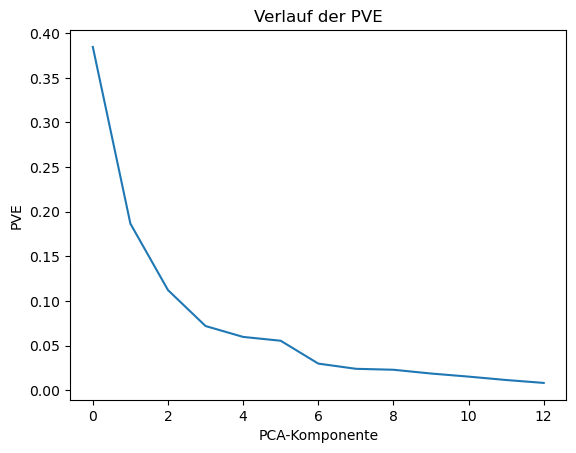

In [325]:
sum_eigen_val = np.sum(sorted_eig_vals)
pve = [y / sum_eigen_val for y in sorted_eig_vals]
plt.plot(pve)
plt.xlabel("PCA-Komponente")
plt.ylabel("PVE")
plt.title("Verlauf der PVE")
plt.show()

(13) Wir werden nun die PCA als Dimensionsreduktionsmethode einsetzen, indem Sie sich für eine Anzahl an PCA-Richtungen entscheiden, die etwas über 50% der gesamten Varianz der Daten enthalten. Betrachten Sie dazu Ihren PVE-Plot aus dem vorherigen Schritt. Wie viele der ersten PCA-Richtungen benötigen Sie, um etwas über 50% der gesamten Varianz der Daten zu erklären?

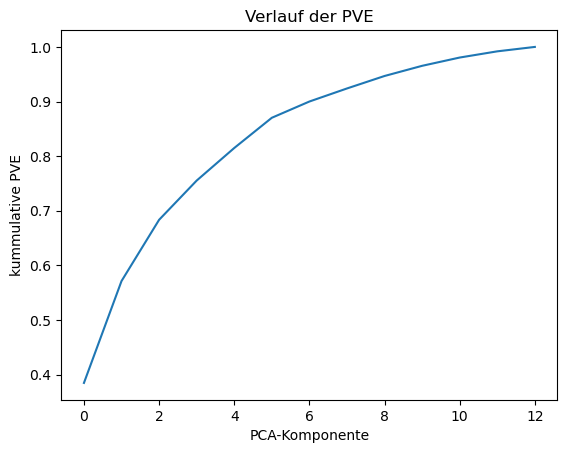

In [326]:
cum_pve = 0
cum_pve_list = []
for y in pve:
    cum_pve_list.append(cum_pve+y)
    cum_pve = cum_pve+y
    
plt.plot(cum_pve_list)
plt.xlabel("PCA-Komponente")
plt.ylabel("kummulative PVE")
plt.title("Verlauf der PVE")
plt.show()

(14) Projizieren Sie Ihre normierten Daten auf die ersten PCA-Komponenten und erhalten Sie damit Ihre neuen Features: Beginnen Sie mit der ersten PCA-Komponente (also auf die Komponente mit dem größten Eigenvektor) und nennen Sie den resultierenden Vektor `x1`. Wiederholen Sie den Vorgang für die nächste PCA-Komponente und nennen Sie den resultierenden Vektor `x2`. Wiederholen Sie diesen Vorgang so lange, bis Sie alle neuen Koordinaten für die im vorherigen Schritt entschiedenen PCA-Komponenten erzeugt haben.

In [327]:
u1 = sorted_eigen_vecs[:,0]
u2 = sorted_eigen_vecs[:,1]

x1 = u1 @ X_train.T
x2 = u2 @ X_train.T

(15) Visualisieren Sie in einem Plot die Datenpunkte in den neuen, im Schritt (14) erzeugten, PCA-Komponenten und kodieren Sie farblich die Zugehörigkeit zur Weinklasse. Für die Farbkodierung kann Ihnen der Vektor `y_train` hilfreich sein. 

* Was fällt Ihnen auf? Lassen sich die verschiedenen Weine in diesem neuen Feature-Raum voneinander unterscheiden?

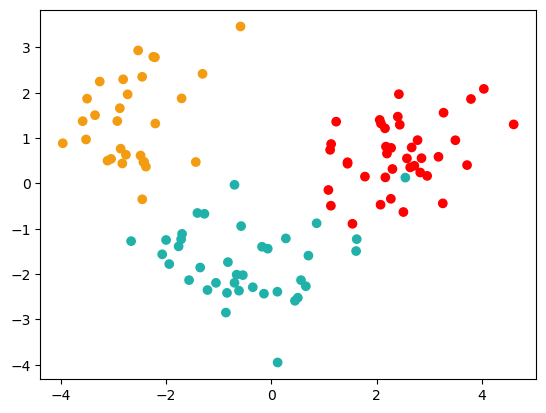

In [328]:
colormap = np.array(['red', 'lightseagreen', '#F39C12'])

plt.scatter(x1,x2,c=colormap[y_train-1])
plt.show()

(16) Nutzen Sie die Eigenvektoren aus Schritt (11), um damit die *Testdaten* in ihre PCA-Komponenten zu projizieren.

* Beachten Sie dabei Folgendes: Wir nutzen hier die PCA-Richtungen, die wir von den **Trainingsdaten** bestimmt haben, um damit die **Testdaten** zu transformieren. Wir nutzen damit dieselbe Transformation für die Trainings- wie für die Testdaten.

* Welches Lernprinzip würde verletzt, wenn wir für die Ermittlung der PCA-Richtungen alle Daten verwenden würden (also Trainings- und Testdaten), um mit den dadurch gewonnenen PCA-Richtungen die Trainings- und die Testdaten zu transformieren? Schlagen Sie in den Vorlesungsfolien nach.

> Data Snooping: Wenn ein Datensatz den Lernprozess in irgendeiner Weise beeinflusst hat, dann wurde seine Fähigkeit zur Einschätzung der Lernleistung (Eout) eingeschränkt

In [329]:
X_test = scaler.transform(X_test)
pca_transform_matrix = np.column_stack((u1,u2)) 
z_test =  X_test @ sorted_eigen_vecs

(17) Trainieren Sie ein neues NN Modell mithilfe der transformierten Trainingsdaten aus Schritt (14) und sagen Sie mithilfe Ihres trainierten Modells die Labels Ihres transformierten Testdatensatzes voraus. Bestimmen Sie - analog zu Schritt (6) - die Genauigkeit Ihres kNN-Klassifikators.

In [330]:
transformed_data = np.column_stack((x1,x2))

nn2 = KNeighborsClassifier(k=1)
nn.fit(transformed_data,y_train)
accuracy_2 = nn.evaluate(z_test[:,:2], y_test)
print(accuracy_2)

0.9583333333333334


(18) Vergleichen Sie die Genauigkeit Ihres Klassifikators aus Schritt (17) mit der aus Schritt (6): Was beobachten Sie? Welche Schlussfolgerung ziehen Sie? (1-3 Sätze)

In [331]:
print(accuracy)
print(accuracy_2)

0.2777777777777778
0.9583333333333334


Durch die Dimensionsreduktion auf d=2 hat sich die Genauigkeit des Klassifikators deutlich! verbessert. Vorher lag diese bei 27,8% und nach der PCA-Dimensionsreduktion auf d=2 bei 95,8%

Dimensionsreduktion kann dazu führen, dass die Modellkomplextität reduziert wird und unnötige Informationen entfernt werden